In [1]:
# Importing all libraries required in this notebook
import pandas as pd
import numpy as np  
import matplotlib.pyplot as plt  
%matplotlib inline

In [24]:
# Reading data from remote link
url = "http://bit.ly/w-data"
data = pd.read_csv(url)
print("Data imported successfully")
data

Data imported successfully


,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


In [25]:
data.head(10)

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


In [27]:
#The method shape returns the Row and Column of the given dataset.
data.shape

(25, 2)

In [28]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


In [29]:
data.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


In [3]:
data.isnull == True

False

In [4]:
import seaborn as sns

In [5]:
#no null value in the Dataset so now visualize our Data.

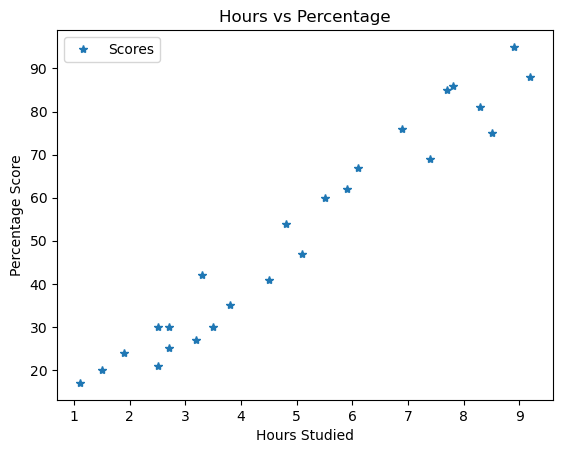

In [6]:
# Plotting the distribution 
data.plot(x='Hours', y='Scores', style='*')  
plt.title('Hours vs Percentage')  
plt.xlabel('Hours Studied')  
plt.ylabel('Percentage Score')  
plt.show()

In [7]:
#in this graph a positive linear relation between number of hr studied and percentage score

In [8]:
#PREPARING DATA

In [9]:
#Devide the data attribute and labels

In [10]:
X=data.iloc[:,:-1].values  
y=data.iloc[:, 1].values

In [31]:
X

array([[2.5],
       [5.1],
       [3.2],
       [8.5],
       [3.5],
       [1.5],
       [9.2],
       [5.5],
       [8.3],
       [2.7],
       [7.7],
       [5.9],
       [4.5],
       [3.3],
       [1.1],
       [8.9],
       [2.5],
       [1.9],
       [6.1],
       [7.4],
       [2.7],
       [4.8],
       [3.8],
       [6.9],
       [7.8]])

In [32]:
#Displays list of scores obtained.
y

array([21, 47, 27, 75, 30, 20, 88, 60, 81, 25, 85, 62, 41, 42, 17, 95, 30,
       24, 67, 69, 30, 54, 35, 76, 86], dtype=int64)

In [11]:
from sklearn.model_selection import train_test_split  
X_train,X_test,y_train,y_test = train_test_split(X, y,test_size=0.2,random_state=0)

In [33]:
#X's training data
X_train

array([[3.8],
       [1.9],
       [7.8],
       [6.9],
       [1.1],
       [5.1],
       [7.7],
       [3.3],
       [8.3],
       [9.2],
       [6.1],
       [3.5],
       [2.7],
       [5.5],
       [2.7],
       [8.5],
       [2.5],
       [4.8],
       [8.9],
       [4.5]])

In [34]:
#X's test data
X_test

array([[1.5],
       [3.2],
       [7.4],
       [2.5],
       [5.9]])

In [36]:

#Y's training data
y_train

array([35, 24, 86, 76, 17, 47, 85, 42, 81, 88, 67, 30, 25, 60, 30, 75, 21,
       54, 95, 41], dtype=int64)

In [37]:
#y's test data
y_test

array([20, 27, 69, 30, 62], dtype=int64)

In [12]:
#TRAINING ALGORITHM

In [13]:
from sklearn.linear_model import LinearRegression  
regressor=LinearRegression()  
regressor.fit(X_train,y_train) 

print("Training complete.")

Training complete.


In [38]:
#The attribute 'coef_' computes the coefficients of the features in the decision function
regressor.coef_

array([9.91065648])

In [39]:
#The attribute 'intercept_' is to represents the constant(bias), added to the decision function.
regressor.intercept_

2.018160041434683

In [41]:
#Checking the percentage of correct predictions for the test data.
print("Accuracy : ",regressor.score(X_test, y_test)*100)

Accuracy :  94.54906892105356


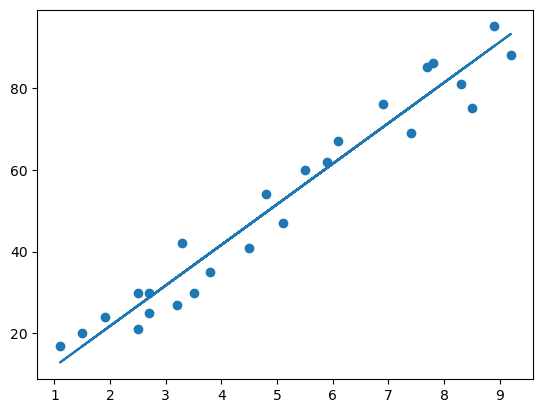

In [14]:
# Plotting the regression line
line = regressor.coef_*X+regressor.intercept_

# Plotting for the test data
plt.scatter(X, y)
plt.plot(X, line);
plt.show()

In [15]:
#MAKING PREDICTION

In [16]:
print(X_test) # Testing data - In Hours
y_pred = regressor.predict(X_test) # Predicting the scores

[[1.5]
 [3.2]
 [7.4]
 [2.5]
 [5.9]]


In [17]:
y_pred

array([16.88414476, 33.73226078, 75.357018  , 26.79480124, 60.49103328])

In [18]:
# Comparing Actual vs Predicted
df = pd.DataFrame({'Actual': y_test,'Predicted': y_pred})  
df 

,Actual,Predicted
0,20,16.884145
1,27,33.732261
2,69,75.357018
3,30,26.794801
4,62,60.491033


<AxesSubplot:>

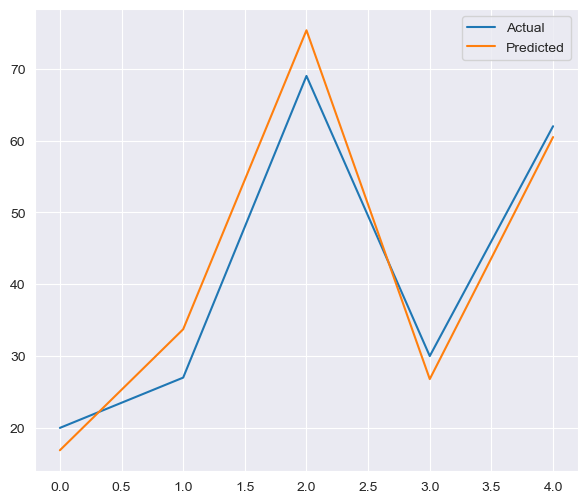

In [42]:
sns.set_style('darkgrid')
df.plot(kind='line',figsize=(7,6))

In [21]:
# You can also test with your own data
hours = 9.25

In [22]:
print("No of Hours = {}".format(hours))

No of Hours = 9.25


In [43]:
own_pred = regressor.predict([[hours]])

In [44]:
print("Predicted Score = {}".format(own_pred[0]))

Predicted Score = 93.69173248737538


In [20]:
from sklearn import metrics  
print('Mean Absolute Error:', 
      metrics.mean_absolute_error(y_test, y_pred)) 

Mean Absolute Error: 4.183859899002975
